In [1]:
import pandas as pd
from scipy.stats import pearsonr

In [2]:
df=pd.read_csv('combined NO2 and rainfall.csv')

In [3]:
df

,system:time_start,mm,Median
0,31-01-2019,4.015,46.349000
1,28-02-2019,33.875,40.444000
2,31-03-2019,17.788,27.180750
3,30-04-2019,41.486,23.987333
4,31-05-2019,51.208,19.292750
5,30-06-2019,95.921,23.507667
6,31-07-2019,165.721,18.340000
7,31-08-2019,243.771,19.311333
8,30-09-2019,270.657,20.630333
9,31-10-2019,122.254,25.666500


In [4]:
mm=df['mm']

In [5]:
Median=df['Median']

In [6]:
corr=pearsonr(mm,Median)

In [7]:
corr

PearsonRResult(statistic=-0.6662519880124704, pvalue=0.00037885240495863607)

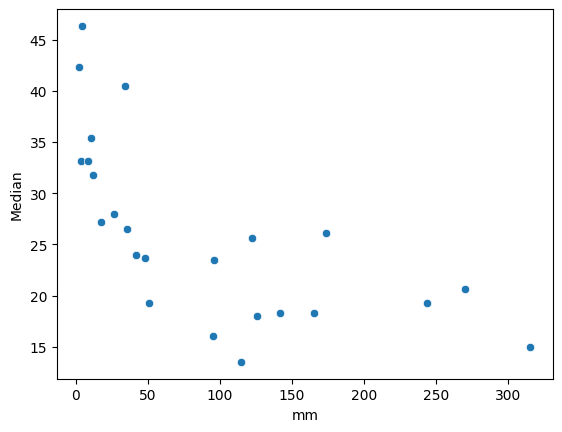

In [8]:
import seaborn as sns
sns.scatterplot(x="mm", y="Median", data=df);

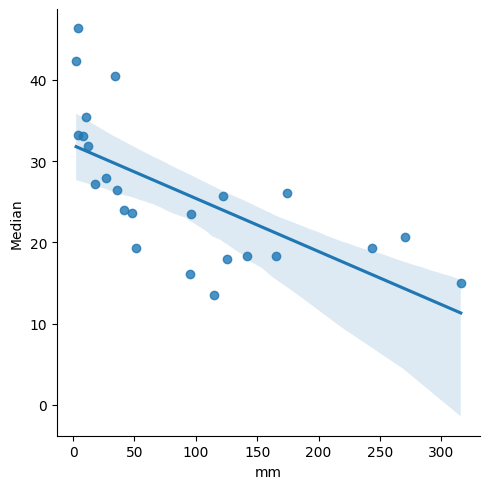

In [9]:
sns.lmplot(x="mm", y="Median", data=df);

In [10]:
from scipy import stats
stats.pearsonr(df['mm'], df['Median'])


PearsonRResult(statistic=-0.6662519880124704, pvalue=0.00037885240495863607)

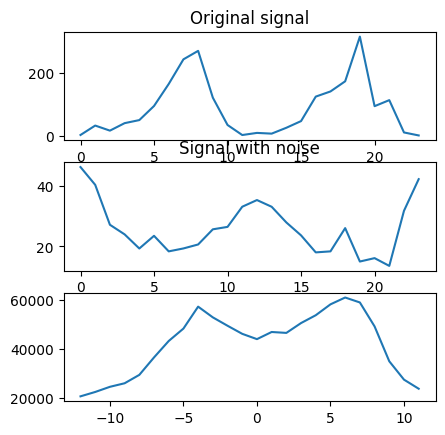

In [11]:
import numpy as np
from scipy import signal
correlation = signal.correlate(mm,Median, mode="same")
lags = signal.correlation_lags(mm.size, Median.size, mode="same")
lag = lags[np.argmax(correlation)]
import matplotlib.pyplot as plt

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(mm)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(Median)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')

ax_corr.plot(lags, correlation)

In [12]:
lag

6

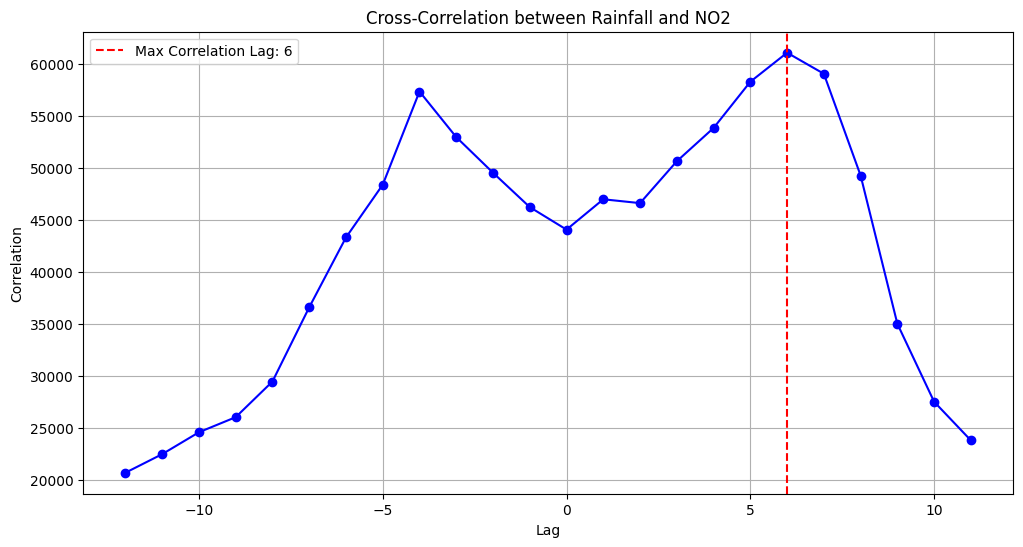

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation, marker='o', linestyle='-', color='b')
plt.axvline(x=lag, color='r', linestyle='--', label=f'Max Correlation Lag: {lag}')
plt.title('Cross-Correlation between Rainfall and NO2')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.show()


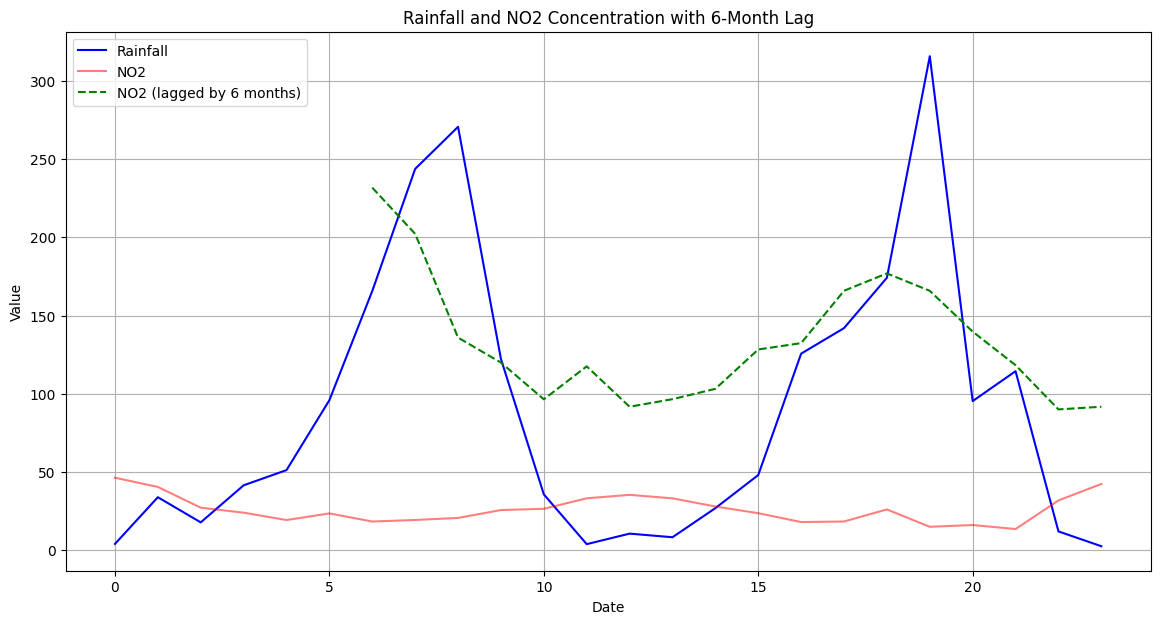

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

lag = 6
no2_lagged = Median.shift(lag)*5

plt.figure(figsize=(14, 7))
plt.plot(mm.index, mm, label='Rainfall', color='b')
plt.plot(Median.index, Median, label='NO2', color='r', alpha=0.5)
plt.plot(no2_lagged.index, no2_lagged, label='NO2 (lagged by 6 months)', color='g', linestyle='--')
plt.title('Rainfall and NO2 Concentration with 6-Month Lag')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df=pd.read_csv('combined MI and rainfall.csv')

In [16]:
df

,system:time_start,mm,MangroveIndex
0,31-01-2019,4.015,0.185902
1,28-02-2019,33.875,0.195136
2,31-03-2019,17.788,0.189660
3,30-04-2019,41.486,0.130641
4,31-05-2019,51.208,0.131874
5,30-06-2019,95.921,0.203639
6,31-07-2019,165.721,0.190589
7,31-08-2019,243.771,0.285313
8,30-09-2019,270.657,0.281532
9,31-10-2019,122.254,0.277750


In [17]:
mm=df['mm']

In [18]:
MI=df['MangroveIndex']

In [19]:
corr=pearsonr(mm,MI)

In [20]:
corr

PearsonRResult(statistic=0.5499769885607196, pvalue=0.0053649040509907535)

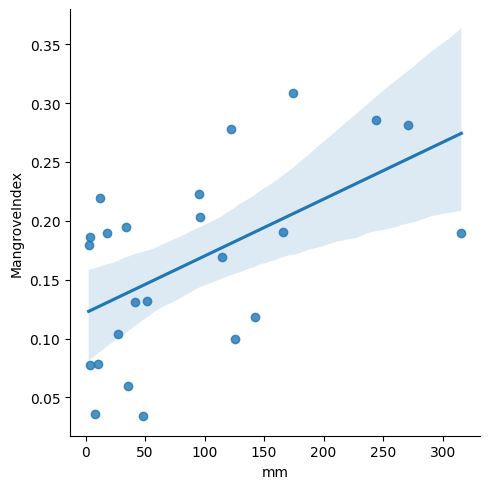

In [21]:
sns.lmplot(x="mm", y="MangroveIndex", data=df);

In [22]:
scipy_correlation, _ = pearsonr(mm,MI)
scipy_correlation

0.5499769885607196

In [23]:
import numpy as np
numpy_correlation = np.corrcoef(mm, MI)[0, 1]
numpy_correlation

0.5499769885607197

In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ayush\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
import statsmodels.api as sm

statsmodels_correlation = sm.OLS(mm, MI).fit().rsquared
statsmodels_correlation

0.6551361750314406

In [26]:
import numpy as np
from scipy import signal
correlation = signal.correlate(mm,MI, mode="same")
lags = signal.correlation_lags(mm.size, MI.size, mode="same")
lag = lags[np.argmax(correlation)]

In [27]:
correlation

array([208.19404345, 201.39940399, 178.80554964, 135.38674212,
       119.31117773, 129.20839535, 167.55604122, 203.31827551,
       288.30809133, 341.45072881, 405.2055898 , 457.6207364 ,
       448.3791206 , 429.01822305, 334.75725102, 294.8023799 ,
       241.72314808, 248.43108924, 235.3140323 , 249.08570225,
       225.9040917 , 207.58420445, 240.5634007 , 239.86103348])

In [28]:
lag

-1

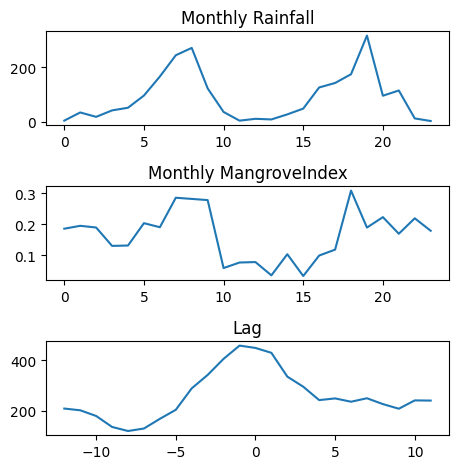

In [29]:
import matplotlib.pyplot as plt

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(mm)
ax_orig.set_title('Monthly Rainfall')
ax_noise.plot(MI)
ax_noise.set_title('Monthly MangroveIndex')
plt.tight_layout()
ax_corr.set_title('Lag')

ax_corr.plot(lags, correlation)

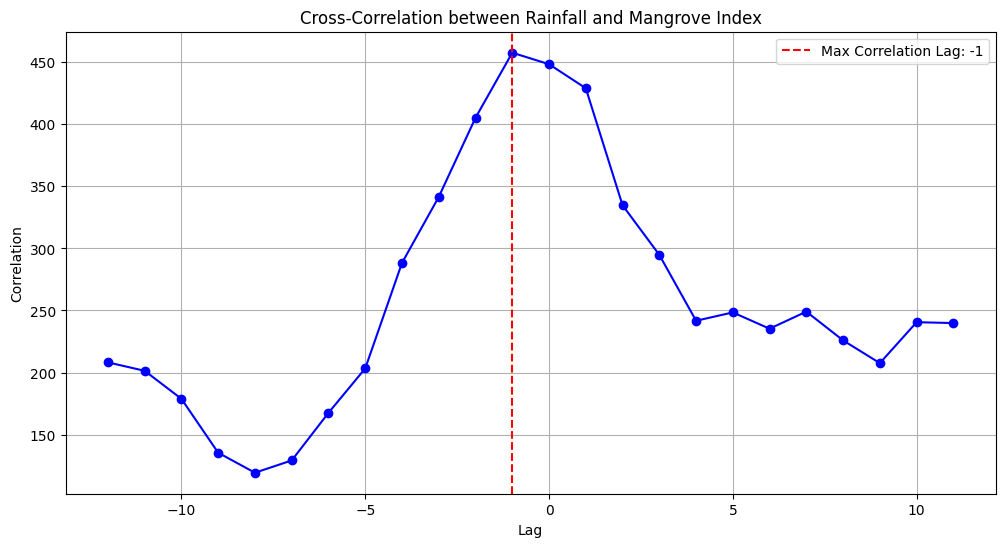

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation, marker='o', linestyle='-', color='b')
plt.axvline(x=lag, color='r', linestyle='--', label=f'Max Correlation Lag: {lag}')
plt.title('Cross-Correlation between Rainfall and Mangrove Index')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.show()
